# Primer punto

In [1]:
# Se importan algunas librerias
import pandas as pd
import numpy as np

In [2]:
#Se leen los datos
df_transaction = pd.read_csv("C:/Users/abrah/Downloads/train_transaction.csv")
df_identity = pd.read_csv("C:/Users/abrah/Downloads/train_identity.csv")

In [3]:
# Se crean varibales para el tamaño de filas y columnas

col_size = df_transaction.shape[1]
fil_size = df_transaction.shape[0]
fil_size, col_size

(590540, 394)

In [4]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Se realiza una limpieza de datos para disminuir el su tamaño y obtener datos mas representativos al contar con muchos datos NaN

new_df_transaction =df_transaction.dropna(axis = 0, thresh=col_size*0.8)
new_df_transaction =new_df_transaction.dropna(axis = 1, thresh=fil_size*0.095)
new_df_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card3,card4,card6,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
10,2987010,0,86549,75.887,C,16496,117.0,mastercard,credit,1.0,...,90.327904,90.327904,90.327904,90.327904,0.000000,0.000000,0.000000,75.887497,75.887497,75.887497
11,2987011,0,86555,16.495,C,4461,185.0,mastercard,debit,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,2987040,0,87209,75.887,C,13329,117.0,visa,credit,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48,2987048,0,87317,42.294,C,15885,185.0,visa,debit,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49,2987049,0,87317,3.595,C,12730,185.0,mastercard,credit,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590499,3577499,0,15810276,58.512,C,14260,185.0,mastercard,credit,2.0,...,87.767998,87.767998,87.767998,87.767998,643.632019,643.632019,643.632019,0.000000,0.000000,0.000000
590501,3577501,0,15810344,58.512,C,3154,185.0,mastercard,debit,2.0,...,0.000000,0.000000,0.000000,0.000000,58.512001,58.512001,58.512001,0.000000,0.000000,0.000000
590509,3577509,0,15810491,28.527,C,16136,185.0,visa,debit,1.0,...,39.839001,39.839001,39.839001,39.839001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590521,3577521,0,15810802,48.877,C,12019,106.0,mastercard,debit,1.0,...,60.066002,60.066002,60.066002,60.066002,488.765991,488.765991,488.765991,0.000000,0.000000,0.000000


In [6]:
# Se muestra el reconteo de la muestra de datsos para fraudes
new_df_transaction.isFraud.value_counts()

isFraud
0    50707
1     5540
Name: count, dtype: int64

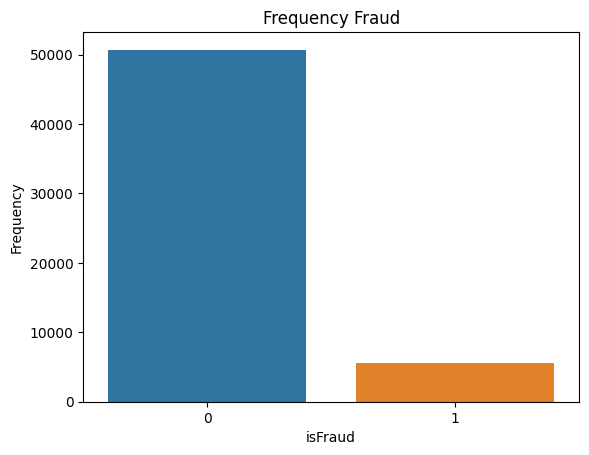

In [7]:
# Se grafica lo antes expuesto
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Frequency Fraud')
sns.countplot(x=new_df_transaction.isFraud)
plt.ylabel('Frequency')
plt.show()

In [8]:
# Se elimina la comuluna TransactionID

new_df_transaction.drop(["TransactionID"], axis=1)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card3,card4,card6,C1,C2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
10,0,86549,75.887,C,16496,117.0,mastercard,credit,1.0,4.0,...,90.327904,90.327904,90.327904,90.327904,0.000000,0.000000,0.000000,75.887497,75.887497,75.887497
11,0,86555,16.495,C,4461,185.0,mastercard,debit,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,0,87209,75.887,C,13329,117.0,visa,credit,2.0,5.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48,0,87317,42.294,C,15885,185.0,visa,debit,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49,0,87317,3.595,C,12730,185.0,mastercard,credit,1.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590499,0,15810276,58.512,C,14260,185.0,mastercard,credit,2.0,14.0,...,87.767998,87.767998,87.767998,87.767998,643.632019,643.632019,643.632019,0.000000,0.000000,0.000000
590501,0,15810344,58.512,C,3154,185.0,mastercard,debit,2.0,15.0,...,0.000000,0.000000,0.000000,0.000000,58.512001,58.512001,58.512001,0.000000,0.000000,0.000000
590509,0,15810491,28.527,C,16136,185.0,visa,debit,1.0,2.0,...,39.839001,39.839001,39.839001,39.839001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590521,0,15810802,48.877,C,12019,106.0,mastercard,debit,1.0,9.0,...,60.066002,60.066002,60.066002,60.066002,488.765991,488.765991,488.765991,0.000000,0.000000,0.000000


In [9]:
# Se muestra las variables que corresponden a datos tipo objeto

position = []
for i, columna in enumerate(new_df_transaction.columns):
    if new_df_transaction[columna].dtype == 'object':
        position.append(i)
print(position)
new_df_transaction.columns[position]

[4, 7, 8]


Index(['ProductCD', 'card4', 'card6'], dtype='object')

In [10]:
# Se crea una variable para estas variables tipo objeto

ohc = new_df_transaction[new_df_transaction.columns[position]]

In [17]:
# Se eliminan estas variables de la data original

new_df_transaction = new_df_transaction.drop(new_df_transaction.columns[position],axis=1)

In [18]:
# Se muestra parámetros requeridos

new_df_transaction.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,56247.0,3.278141e+06,1.689816e+05,2987010.000,3121091.50,3268681.000,3.415296e+06,3577529.0
isFraud,56247.0,9.849414e-02,2.979843e-01,0.000,0.00,0.000,0.000000e+00,1.0
TransactionDT,56247.0,7.242018e+06,4.606492e+06,86549.000,2674373.00,6883609.000,1.081276e+07,15810912.0
TransactionAmt,56247.0,5.739276e+01,8.168781e+01,0.251,20.12,34.742,6.694750e+01,1500.0
card1,56247.0,9.941244e+03,5.093719e+03,1000.000,5347.00,9633.000,1.577500e+04,18383.0
...,...,...,...,...,...,...,...,...
V317,56247.0,1.431827e+02,1.705774e+03,0.000,0.00,0.000,0.000000e+00,36191.0
V318,56247.0,1.377573e+02,1.676129e+03,0.000,0.00,0.000,0.000000e+00,35766.0
V319,56247.0,2.062604e+01,4.212177e+02,0.000,0.00,0.000,0.000000e+00,64800.0
V320,56247.0,3.717719e+01,4.946947e+02,0.000,0.00,0.000,0.000000e+00,64800.0


In [19]:
new_df_transaction.drop(["TransactionID"],axis=1)

,isFraud,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,C4,C5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
10,0,86549,75.887,16496,117.0,1.0,4.0,0.0,1.0,0.0,...,90.327904,90.327904,90.327904,90.327904,0.000000,0.000000,0.000000,75.887497,75.887497,75.887497
11,0,86555,16.495,4461,185.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,0,87209,75.887,13329,117.0,2.0,5.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48,0,87317,42.294,15885,185.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49,0,87317,3.595,12730,185.0,1.0,2.0,0.0,2.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590499,0,15810276,58.512,14260,185.0,2.0,14.0,0.0,1.0,0.0,...,87.767998,87.767998,87.767998,87.767998,643.632019,643.632019,643.632019,0.000000,0.000000,0.000000
590501,0,15810344,58.512,3154,185.0,2.0,15.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,58.512001,58.512001,58.512001,0.000000,0.000000,0.000000
590509,0,15810491,28.527,16136,185.0,1.0,2.0,0.0,2.0,0.0,...,39.839001,39.839001,39.839001,39.839001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590521,0,15810802,48.877,12019,106.0,1.0,9.0,0.0,1.0,0.0,...,60.066002,60.066002,60.066002,60.066002,488.765991,488.765991,488.765991,0.000000,0.000000,0.000000


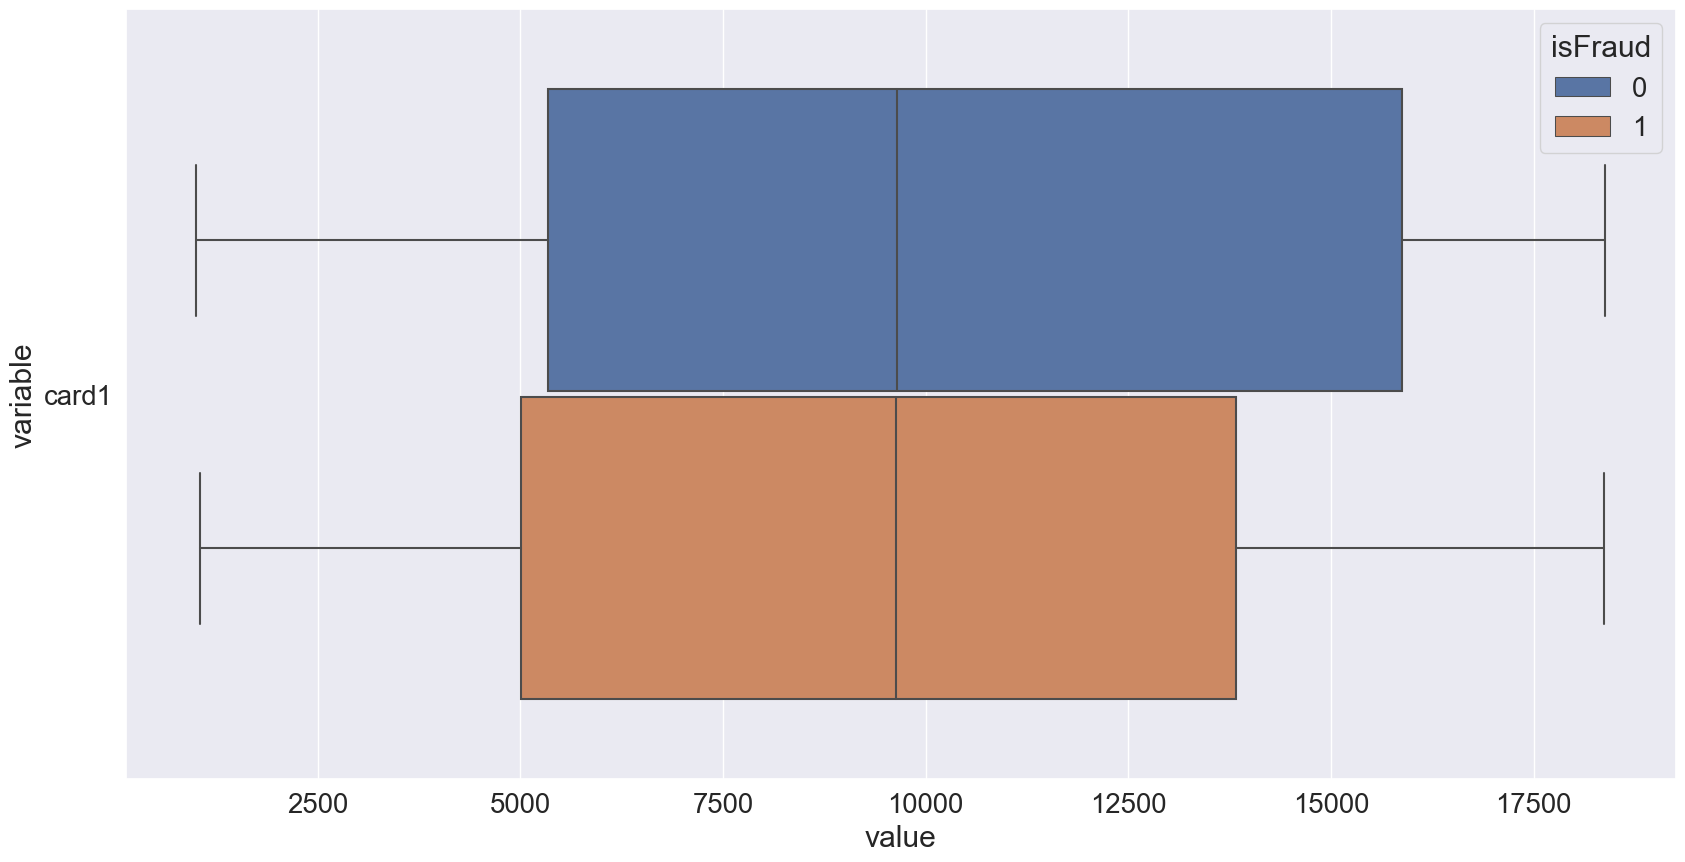

In [26]:
melted_data = pd.melt(new_df_transaction, id_vars = "isFraud",value_vars = ['card1'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

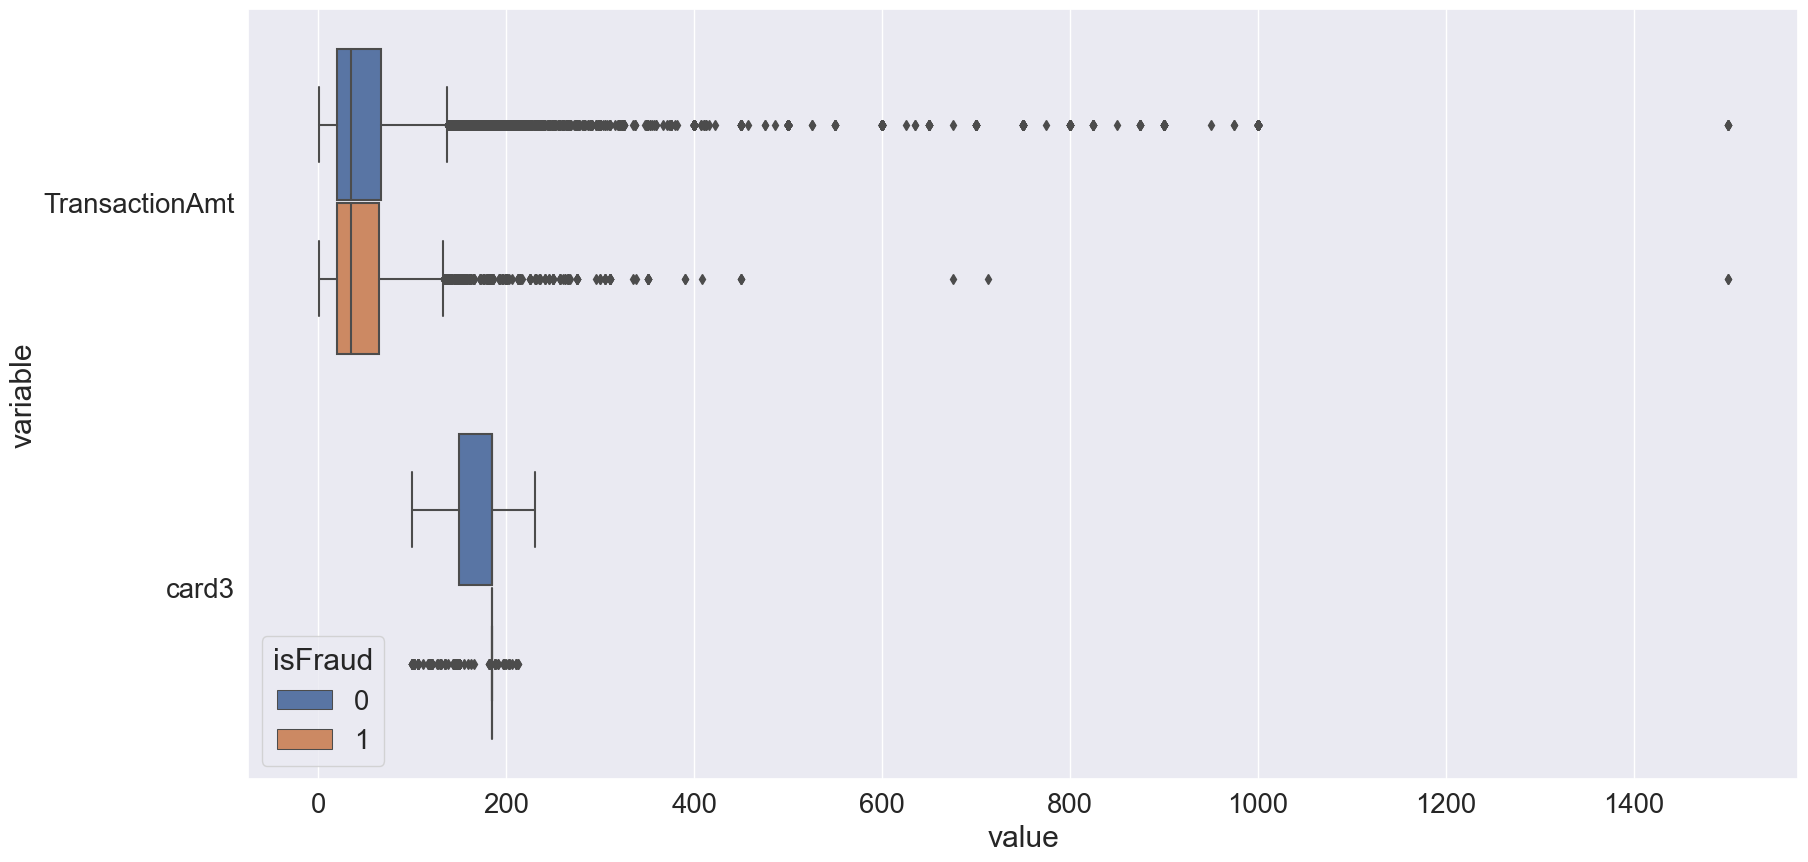

In [30]:
melted_data = pd.melt(new_df_transaction, id_vars = "isFraud",value_vars = ['TransactionAmt','card3'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

In [39]:
# Se evalua cual es Kn es el mas óptimo

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = new_df_transaction.drop(['isFraud'], axis = 1)
y = new_df_transaction['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values